# Feature Extraction From Audio

This is an example that shows loading, playing, generating and saving audio. It also explores plotting waveforms, and spectrograms with log frequency axis. Finally, it shows feature extraction including Zero Crossing Rate, Spectral Centroid, Spectral Rolloff, and MFCC.

[Kaggle Link](https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio/notebook)


In [369]:
import warnings
warnings.filterwarnings('ignore')


## Loading an audio file


In [370]:
import librosa
audio_path = './input/train_curated/0006ae4e.wav'
x, sr = librosa.load(audio_path)


## Playing Audio


In [371]:
import IPython.display as ipd
ipd.Audio(audio_path)


## Visualizing Audio


(155228,)


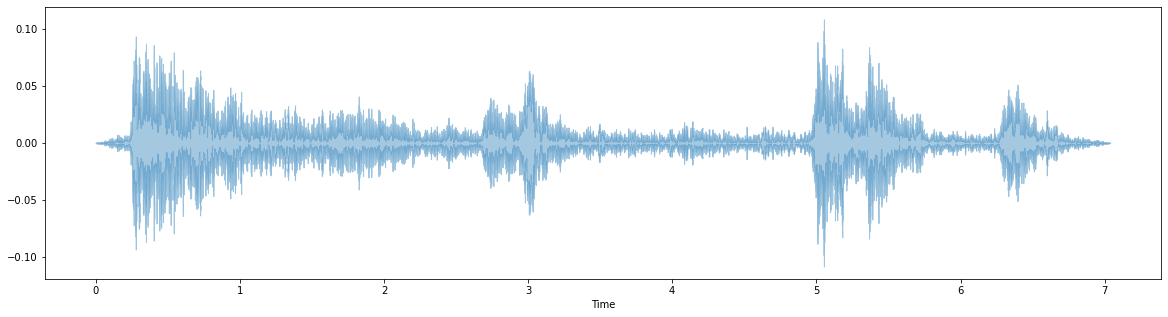

In [372]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
print(x.shape)
librosa.display.waveshow(x, sr=sr, alpha=0.4)


### Spectrogram


(1025, 304)


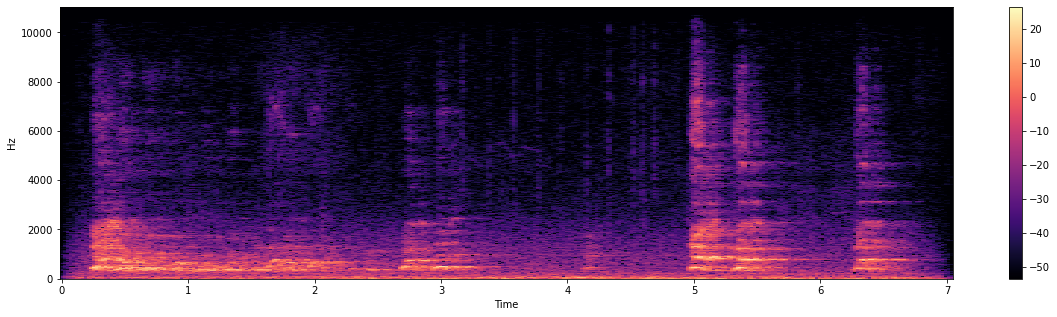

In [373]:
X = librosa.stft(x)
print(X.shape)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


#### Log Frequency axis


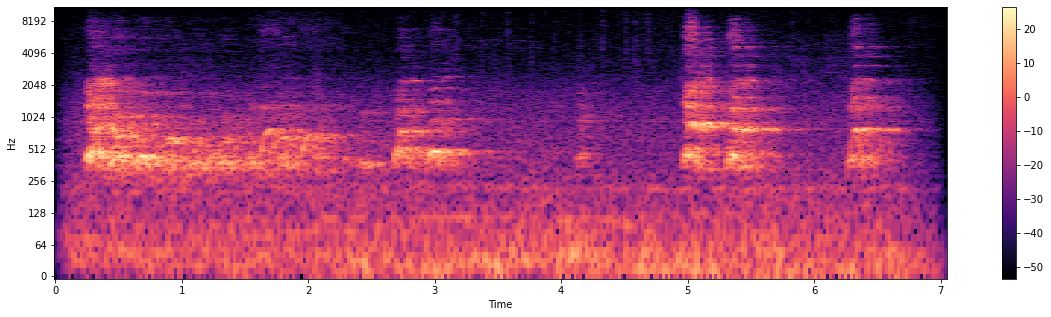

In [374]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


### Mel-Spectrogram

https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53

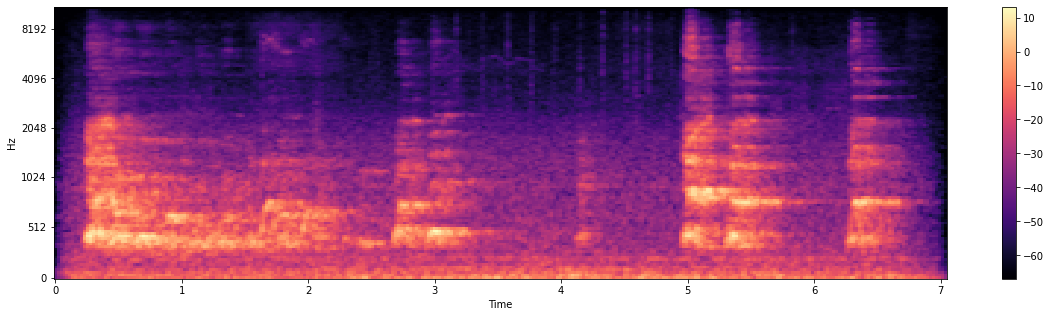

In [375]:
plt.figure(figsize=(20, 5))
mel_spect = librosa.feature.melspectrogram(y=x, sr=sr)
mel_spect = librosa.power_to_db(mel_spect)
librosa.display.specshow(mel_spect, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()


### Constant-Q Transform

TODO

## Creating an audio signal

Let's create a 220hz audio signal using a numpy array


In [376]:
import numpy as np
sr = 22050
T = 5.0
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = 0.5 * np.sin(2*np.pi*220*t)


#### Playing the sound


In [377]:
ipd.Audio(x, rate=sr)


#### Saving the signal


In [378]:
import soundfile as sf
sf.write('./out/tone_220.wav', x, sr, 'PCM_24')


## Feature Extraction


In [379]:
x, sr = librosa.load('./input/train_noisy/000b6cfb.wav')
ipd.Audio(x, rate=sr)


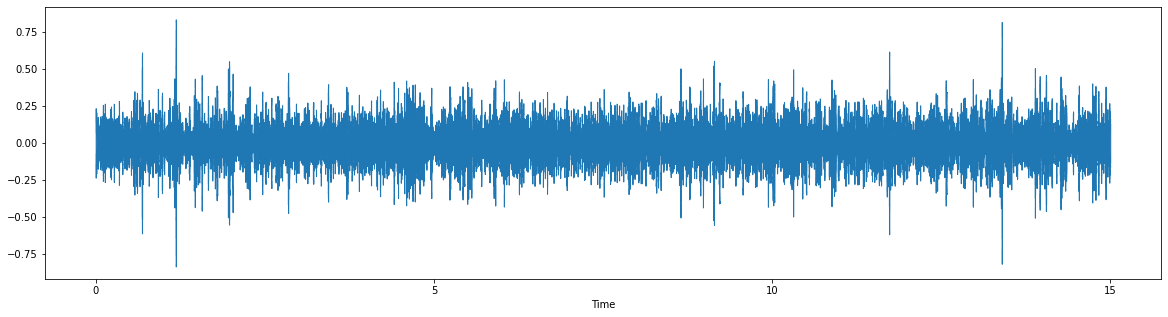

In [380]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)


### Zero Crossing Rate

https://en.wikipedia.org/wiki/Zero-crossing_rate


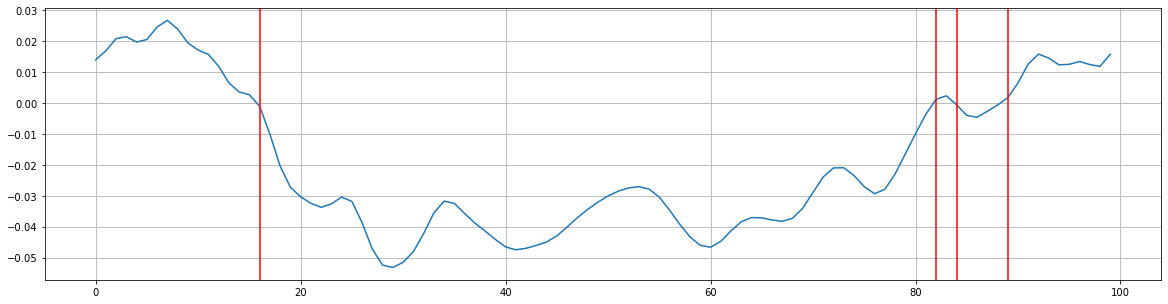

In [381]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

# Find and paint zero crossings
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossing_indicies = np.where(zero_crossings == True)[0]

for i in zero_crossing_indicies:
    plt.axvline(x=i, color='r')


### Spectral Centroid


In [382]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

spectral_centroids.shape


(646,)

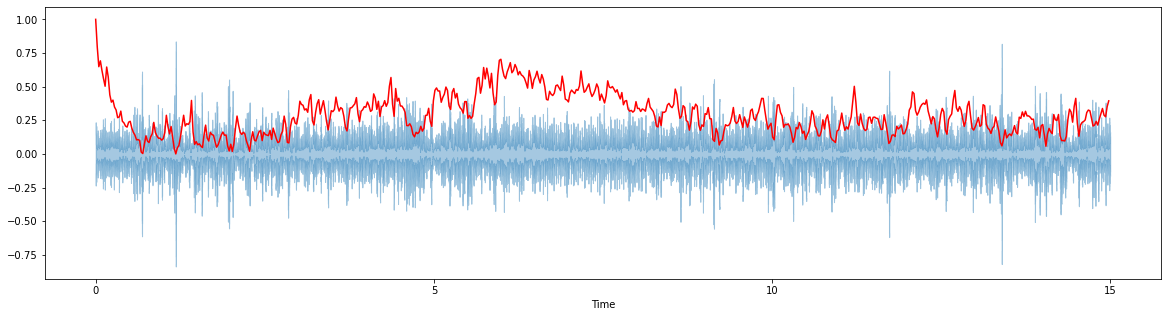

In [383]:
import sklearn

# Computing the time variable for visualization
plt.figure(figsize=(20, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


def normalize(x, axis=0):
    # Normalising the spectral centroid for visualization
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


#### Spectral Centroid on Spectrogram

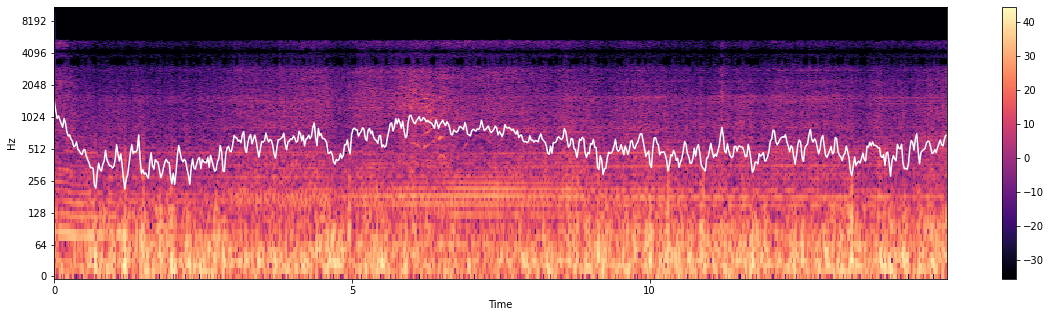

In [384]:
# Plotting the Spectrogram
plt.figure(figsize=(20, 5))
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar()


# Plotting the Spectral Centroid along the Spectrogram
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
plt.plot(t, spectral_centroids, color='w')


### Spectral Rolloff


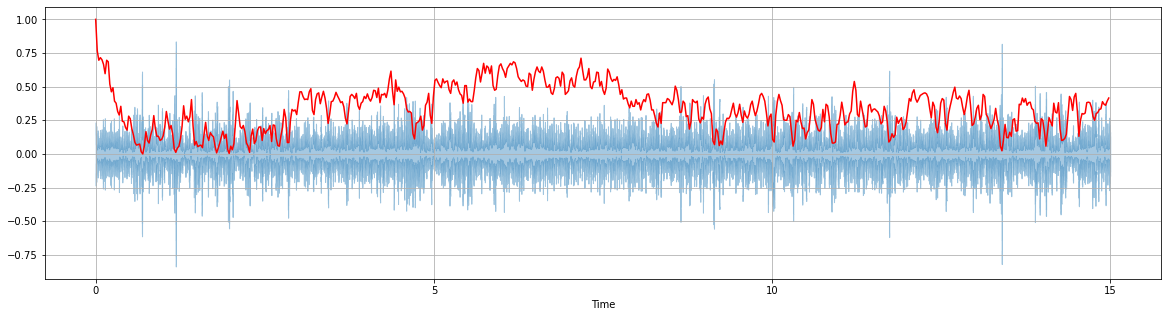

In [385]:
plt.figure(figsize=(20, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()


### Spectral Flux

TODO

### Band Energy Ratio

TODO

## MFCC

Rate of change in spectral bands weighted to match human perception

[Mel-frequency cepstrum – Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)

[The Dummy's Guide to MFCC – Medium](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)


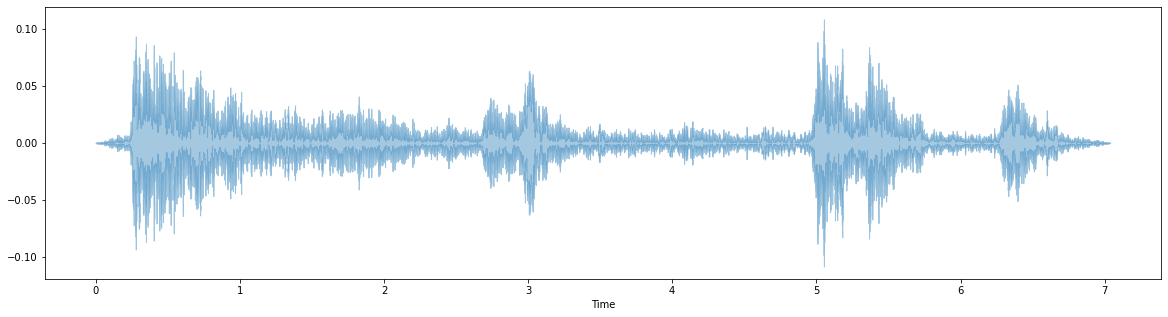

In [386]:
plt.figure(figsize=(20, 5))
x, fs = librosa.load('./input/train_curated/0006ae4e.wav')
librosa.display.waveshow(x, sr=sr, alpha=0.4)


(20, 304)


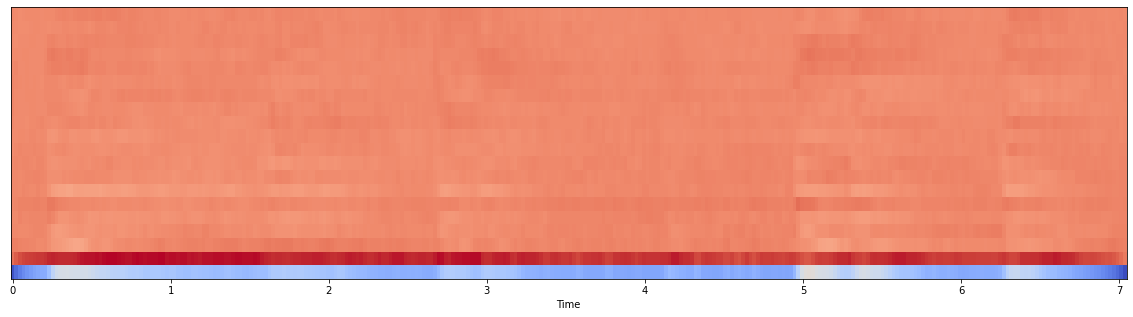

In [387]:
# MFCC
plt.figure(figsize=(20, 5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


### Feature Scaling

We're going to scale the MFCCs so that each coefficient dimension has zero mean and unit variance

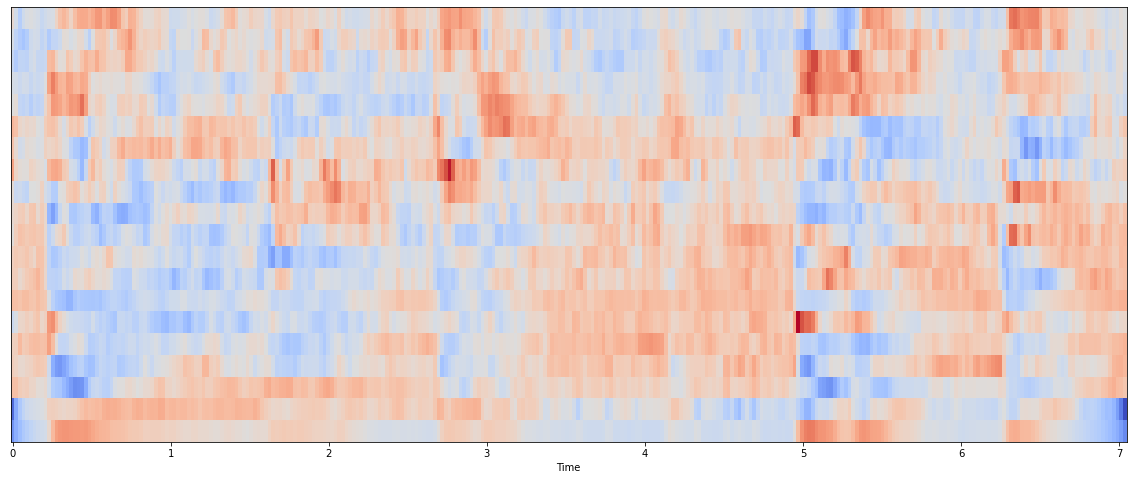

In [388]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

plt.figure(figsize=(20, 8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


## Chromagram

Shows the prevailing key / [pitch class](https://en.wikipedia.org/wiki/Pitch_class) over time


In [389]:
x, sr = librosa.load('input/train_curated/0006ae4e.wav')

ipd.Audio(x, rate=sr)


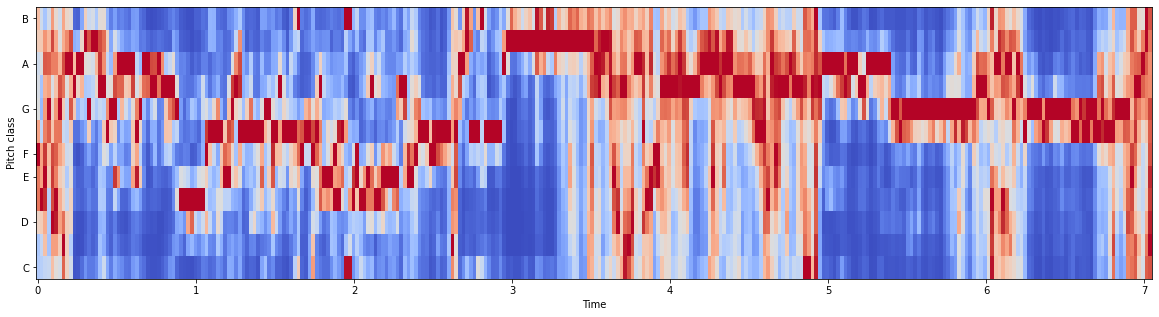

In [390]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time',
                         y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
